# Calculate DNA volume via Monte Carlo simulation.

**Ali Akbar Riaz, Erik Jing Wei Feng, Abdul Rahman**

Deadline: **Nov 9, 2025**

<h1>Abstract</h1>

<h1>Introduction</h1>

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Task 0

In [3]:
#Unit is nm
x_min, x_max = 0, 100
y_min, y_max = 0, 100
z_min, z_max = 0, 100

## Task 1

In [ ]:
def random_point():    
    """
    Gives random point within simulation box
    
    Outputs
    -------
    Array of [x, y, z]
    """
    return (np.array([random.uniform(x_min, x_max), random.uniform(y_min, y_max), random.uniform(z_min, z_max),]))

43.65789911311197


## Task 2

In [222]:
def define_sphere():
    """
    Defines a sphere with random point and random size. Can stick out.

    Outputs
    -------
    array of [x, y, z]
    radius
    """
    return (random_point(), random.uniform(0, 20))

## Task 3

In [ ]:
def is_inside_sphere(point, spherePosition, radius):
    """
    Checks if a point is inside given sphere.
    Inputs
    -------
    point : array of coordinates being checked [x, y, z]
    spherePosition : array of sphere center posititon [x_c, y_c, z_c]
    radius : radius of sphere 

    Outputs
    -------
    boolean 
    """
    if ((point[0]-spherePosition[0])**2 + (point[1]-spherePosition[1])**2 + (point[2]-spherePosition[2])**2) <= radius**2:
        return True
    else:
        return False

False


## Task 4 

0.029431149415582714


Text(0.5, 1.0, 'Fraction of points inside circle based on total random points')

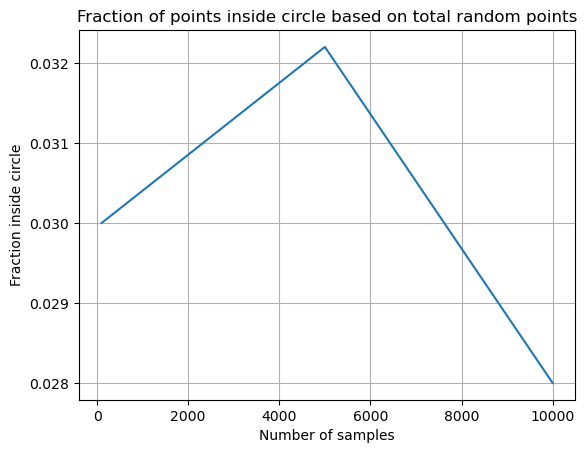

In [228]:
def fraction_inside_sphere(numSample, spherePosition, radius):
    inside_sphere = 0
    for _ in range(numSample):
        if is_inside_sphere(random_point(), spherePosition, radius) == True:
            inside_sphere += 1
    return inside_sphere/numSample

numSamples  = [100, 5000, 10000]
spherePosition, radius = define_sphere()
fractions = []

for n in numSamples:
    fractions.append(fraction_inside_sphere(n, spherePosition, radius))

#To check if the result is right we use the exact theoretical fraction
analyticalResult = (((4/3)*math.pi*radius**3) / (x_max * y_max * z_max))
print(analyticalResult)

plt.plot(numSamples, fractions)
plt.grid()
plt.xlabel("Number of samples")
plt.ylabel("Fraction inside circle")
plt.title("Fraction of points inside circle based on total random points")

Since we dont constrain the sphere to be completly inside the simulation box its possible for it to extend beyond it, if its center is in a corner for example. The analytical formula dosent take this into account. Therefore discrepancies between the Monte Carlo estimate and the analytical are expected.

## Task 5

From the analytical formula we can derive that if we set the sphere center at the center of the simulation box we get:


$f = \frac{\text{Number of points inside sphere}}{\text{Total number of points}}$

$f \approx \frac{\text{Volume of sphere}}{\text{Volume of simulation box}} 
= \frac{\frac{4}{3} \pi r^3}{X_{\text{max}} Y_{\text{max}} Z_{\text{max}}}$

$\pi \approx \frac{3 \, f \, X_{\text{max}} Y_{\text{max}} Z_{\text{max}}}{4 r^3}$


In [ ]:
def calculate_pi(numSample, spherePosition, radius):
    inside_sphere = 0
    for _ in range(numSample):
        if is_inside_sphere(random_point(), spherePosition, radius) == True:
            inside_sphere += 1
    return((3*(inside_sphere/numSample)*x_max*y_max*z_max) / (4*(radius**3)))

calculate_pi(1000, [x_max/2, y_max/2, z_max/2], x_max/2)
